# simulate a faster way...

In [6]:
from epi_model import *

In [7]:
from seirsplus import *

In [8]:
G = nx.Graph()

In [9]:
from csv import DictReader

with open('seirsplus_network.csv', 'r', encoding='utf8') as inf:
    rs = list(DictReader(inf))

rs = [[int(y) for y in sorted(x.values())] for x in rs]

In [10]:
nodes = sorted(set(x[0] for x in rs).union({x[1] for x in rs}))

In [11]:
nm = {n:i for i,n in enumerate(nodes)}

In [12]:
rs = [[nm[x[0]],nm[x[1]]] for x in rs]

In [13]:
G.add_edges_from( rs )

In [14]:
len(G.nodes)

7983

In [15]:
#beta = 1 / 0.2 - 1 # still a little unsure here

In [16]:
from seirsplus.models import SEIRSNetworkModel

In [18]:
m = SEIRSNetworkModel(
        G,               #Network adjacency matrix (numpy array) or Networkx graph object.
        beta=1/1.54,            #Rate of transmission (global interactions)
        #beta_local=1/10,      #Rate(s) of transmission between adjacent individuals (optional)
        sigma=1/4.5,           #Rate of progression to infectious state (inverse of latent period)             
        gamma=1/3.34,           #Rate of recovery (inverse of symptomatic infectious period)           
        mu_I=0.03,            #Rate of infection-related death
        xi=0,              #Rate of re-susceptibility (upon recovery)
        mu_0=0,            #Rate of baseline death
        nu=0,              #Rate of baseline birth                        
        p=0.5,               #Probability of individuals interacting with global population 
)

In [19]:
# they initially infect 10/100,000
# I should do something comparable to the schools...

In [20]:
len(nodes)

7983

In [21]:
m.introduce_exposures( int(len(nodes)*0.2) )

In [22]:
#ttrun = 154 #seconds for 20k network, 10 days
ttrun = 22.5 #seconds for 8k network, 10 days
strategies = 5
sims = 100
infparms = 2

t = ttrun * strategies * sims * infparms
print(f"With these parameters, it would take {t/3600:0.1f} hours to run. {t/(3600*24):0.1f} days.")
print("Better start now!")

With these parameters, it would take 6.2 hours to run. 0.3 days.
Better start now!


In [33]:
import time
ts = time.time()
m.run(50)
te = time.time()
print(te-ts)

t = 0.00
t = 10.00
t = 20.01
t = 30.31
29.152416229248047


In [34]:
num_types = [k for k in m.__dict__ if 'num' == k[:3]]

In [35]:
for n in num_types:
    print(n, getattr(m,n), np.sum(getattr(m,n)))

numNodes 7983 7983
numNodes_Q 7983 7983
numS [7983. 6387. 6387. ...   43.   43.   43.] 46595356.0
numE [   0. 1595. 1594. ...    0.    0.    0.] 24995109.0
numI [0. 1. 2. ... 2. 1. 0.] 60056535.0
numR [0. 0. 0. ... 0. 0. 0.] 0.0
numF [0. 0. 0. ... 0. 0. 0.] 0.0
numQ_E [0. 0. 0. ... 0. 0. 0.] 0.0
numQ_I [0. 0. 0. ... 0. 0. 0.] 0.0
numTested [0. 0. 0. ... 0. 0. 0.] 0.0
numPositive [0. 0. 0. ... 0. 0. 0.] 0.0


In [36]:
m.transitions

{'StoE': {'currentState': 1, 'newState': 2},
 'EtoI': {'currentState': 2, 'newState': 3},
 'ItoR': {'currentState': 3, 'newState': 4},
 'ItoF': {'currentState': 3, 'newState': 5},
 'RtoS': {'currentState': 4, 'newState': 1},
 'EtoQE': {'currentState': 2, 'newState': 6},
 'ItoQI': {'currentState': 3, 'newState': 7},
 'QEtoQI': {'currentState': 6, 'newState': 7},
 'QItoR': {'currentState': 7, 'newState': 4},
 'QItoF': {'currentState': 7, 'newState': 5},
 '_toS': {'currentState': True, 'newState': 1}}

In [37]:
Counter( [x['infection_type'] for x in m.infectionsLog] )

Counter({'StoE': 6344})

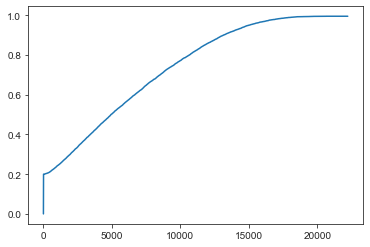

In [44]:
plt.plot( (m.numNodes - m.numS)/m.numNodes )

In [ ]:
inf_perc = (m.numNodes - m.numS)/m.numNodes

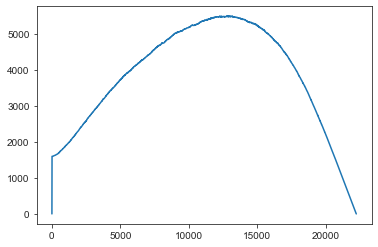

In [39]:
plt.plot(m.total_num_infected())

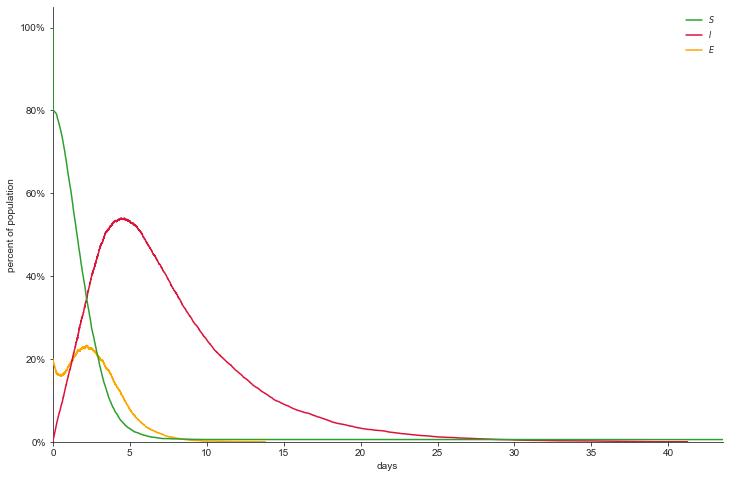

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e9282bd988>)

In [40]:
m.figure_basic()

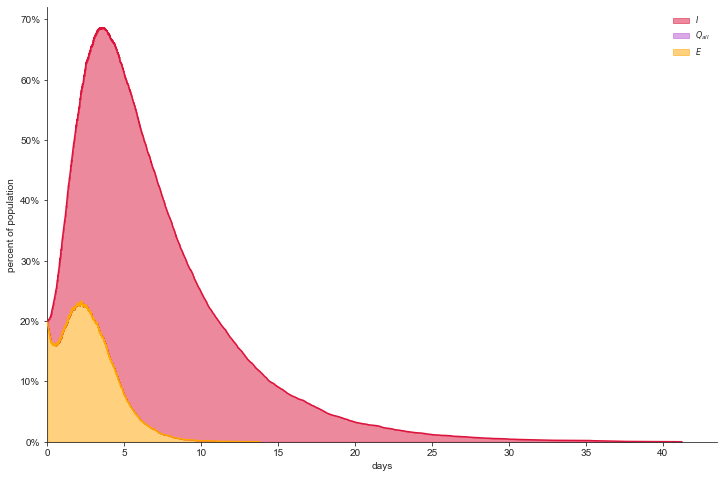

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e9283f57c8>)

In [41]:
m.figure_infections()

# and repeat!

In [27]:
from epi_model import *

In [28]:
from seirsplus.models import SEIRSNetworkModel

In [29]:
net = unweightedNetwork.from_csv('seirsplus_network.csv', 20)

In [30]:
p = dict(params.covid_estimate)
sim = simulations.SEIR_daily(net, p)

In [31]:
strats = [
    sampling.none,
    sampling.rand,
    sampling.friendHighDeg,
    sampling.targeted,
]

In [32]:
beta = 1 / 0.2 - 1 # still a little unsure here

In [33]:
from csv import DictReader

with open('seirsplus_network.csv', 'r', encoding='utf8') as inf:
    rs = list(DictReader(inf))

rs = [[int(y) for y in sorted(x.values())] for x in rs]

nodes = sorted(set(x[0] for x in rs).union({x[1] for x in rs}))

nm = {n:i for i,n in enumerate(nodes)}

rs = [[nm[x[0]],nm[x[1]]] for x in rs]

G = nx.Graph()
G.add_nodes_from( nodes )
G.add_edges_from( rs )

In [34]:
Counter(m.X.flatten())

Counter({1: 6387, 2: 1596})

In [35]:
m.R

4

In [36]:
m.R

4

In [40]:
NSIMS = 1
ms = defaultdict(list)

for i in range(NSIMS):
    print('Sim',i)
    
    for strat in strats:
        print('Strat',strat.__name__)
        
        Gsub = G.copy()
        tovacc = strat(sim, int(0.1*len(G.nodes)))
        Gsub.remove_nodes_from(tovacc)
        Gsub.add_nodes_from(tovacc)
        assert(len(Gsub.edges) != len(G.edges) or strat == sampling.none)

        m = SEIRSNetworkModel(
                Gsub,               #Network adjacency matrix (numpy array) or Networkx graph object.
                beta=beta,            #Rate of transmission (global interactions)
                #beta_local=1/10,      #Rate(s) of transmission between adjacent individuals (optional)
                sigma=1/3,           #Rate of progression to infectious state (inverse of latent period)             
                gamma=1/14,           #Rate of recovery (inverse of symptomatic infectious period)           
                mu_I=0,            #Rate of infection-related death
                xi=0,              #Rate of re-susceptibility (upon recovery)
                mu_0=0,            #Rate of baseline death
                nu=0,              #Rate of baseline birth                        
                p=0,               #Probability of individuals interacting with global population 
        )
            
        m.introduce_exposures( int(len(G.nodes)*0.2) )

        m.run(5, print_interval=None)
        
        ms[strat.__name__].append(
            (m.tseries, m.numNodes - m.numS)
            #(m.numNodes - m.numS)[-1] # total aggregate number infected after the period of time...
        )

Sim 0
Strat none
Strat rand
Strat friendHighDeg
Strat targeted


In [38]:
list(ms)

['none', 'rand', 'friendHighDeg', 'targeted']

In [74]:
#np.sum( ms['friend'][0][:15000] - ms['friendHighDeg'][0][:15000] )

(750.0, 8000.0)

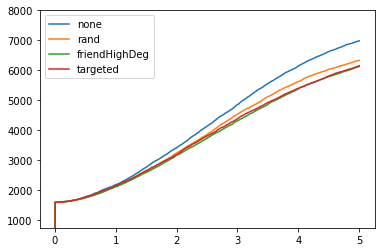

In [41]:
for k,m in ms.items():
    t, y = m[0]
    plt.plot(t, y,label=k)
plt.legend()
#plt.xlim(0,2000)
plt.ylim(750,len(G.nodes))

# simulate the slow way

In [42]:
from epi_model import *

In [44]:
#net = unweightedNetwork.from_csv('seirsplus_network.csv', (15*3600 / 20)) # 15m per contact...
#NEVER DO THIS. THIS CRASHED YOUR COMPUTER

In [46]:
from datetime import datetime

In [47]:
params.daily_to_momentary(net, 0.2)

0.0020053345578178567

In [48]:
p = dict(params.covid_estimate)
sim = simulations.SEIR_daily(net, p)

In [49]:
net.Nnodes

7983

In [50]:
strat = sampling.friendHighDeg
tovacc = strat(sim, int(0.1*len(G.nodes)))
nmap = {n:i for i,n in enumerate(G.nodes)}

for who in tovacc:
    sim.state_change(nmap[who], 'vacc')

for who in sample([x for x in range(net.Nnodes)], int(0.2*net.Nnodes)):
    sim.state_change(who, 'exp')    

sim.run(5)

In [51]:
sim.meas['rec'][-1] + sim.meas['inf'][-1] + sim.meas['exp'][-1]

1690.0

In [52]:
sorted(sim.meas)

['exp', 'inf', 'rec', 'sus', 'vacc']

In [53]:
sim.meas['rec']

[0.0, 6.0, 20.0, 41.0, 59.0]

In [54]:
ms.keys()

dict_keys(['none', 'rand', 'friendHighDeg', 'targeted'])

In [56]:
np.sum( [
    np.array(sim.meas[K])
    for K in ['inf','rec','exp']
], axis=0 )

array([1596., 1607., 1627., 1658., 1690.])

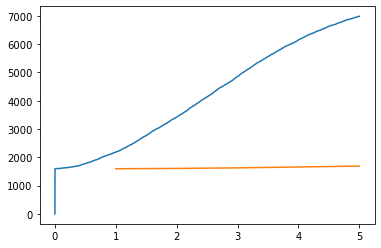

In [55]:
t, y = ms['none'][0]
plt.plot(t, y, label='continuous')

plt.plot(
    range(1,6),
    np.sum( [
        np.array(sim.meas[K])
        for K in ['inf','rec','exp']
    ], axis=0 )
)